## Assignment 8

**Exercises 5, 7 and 8**

## 5 (a-i)

(a) Generating dataset with quadratic decision boundary...
Dataset created: 500 observations with 2 features
Class distribution: [247 253]

(c) Fitting linear logistic regression...
(d) Plotting linear logistic regression results...
Linear logistic regression accuracy: 0.430

(e) Fitting non-linear logistic regression...
(f) Plotting non-linear logistic regression results...
Non-linear logistic regression accuracy: 0.958

(g) Fitting linear SVM...
Linear SVM accuracy: 0.506

(h) Fitting non-linear SVM with RBF kernel...
Non-linear SVM (RBF) accuracy: 0.986

Additional: Fitting SVM with polynomial kernel...
Polynomial SVM accuracy: 0.980


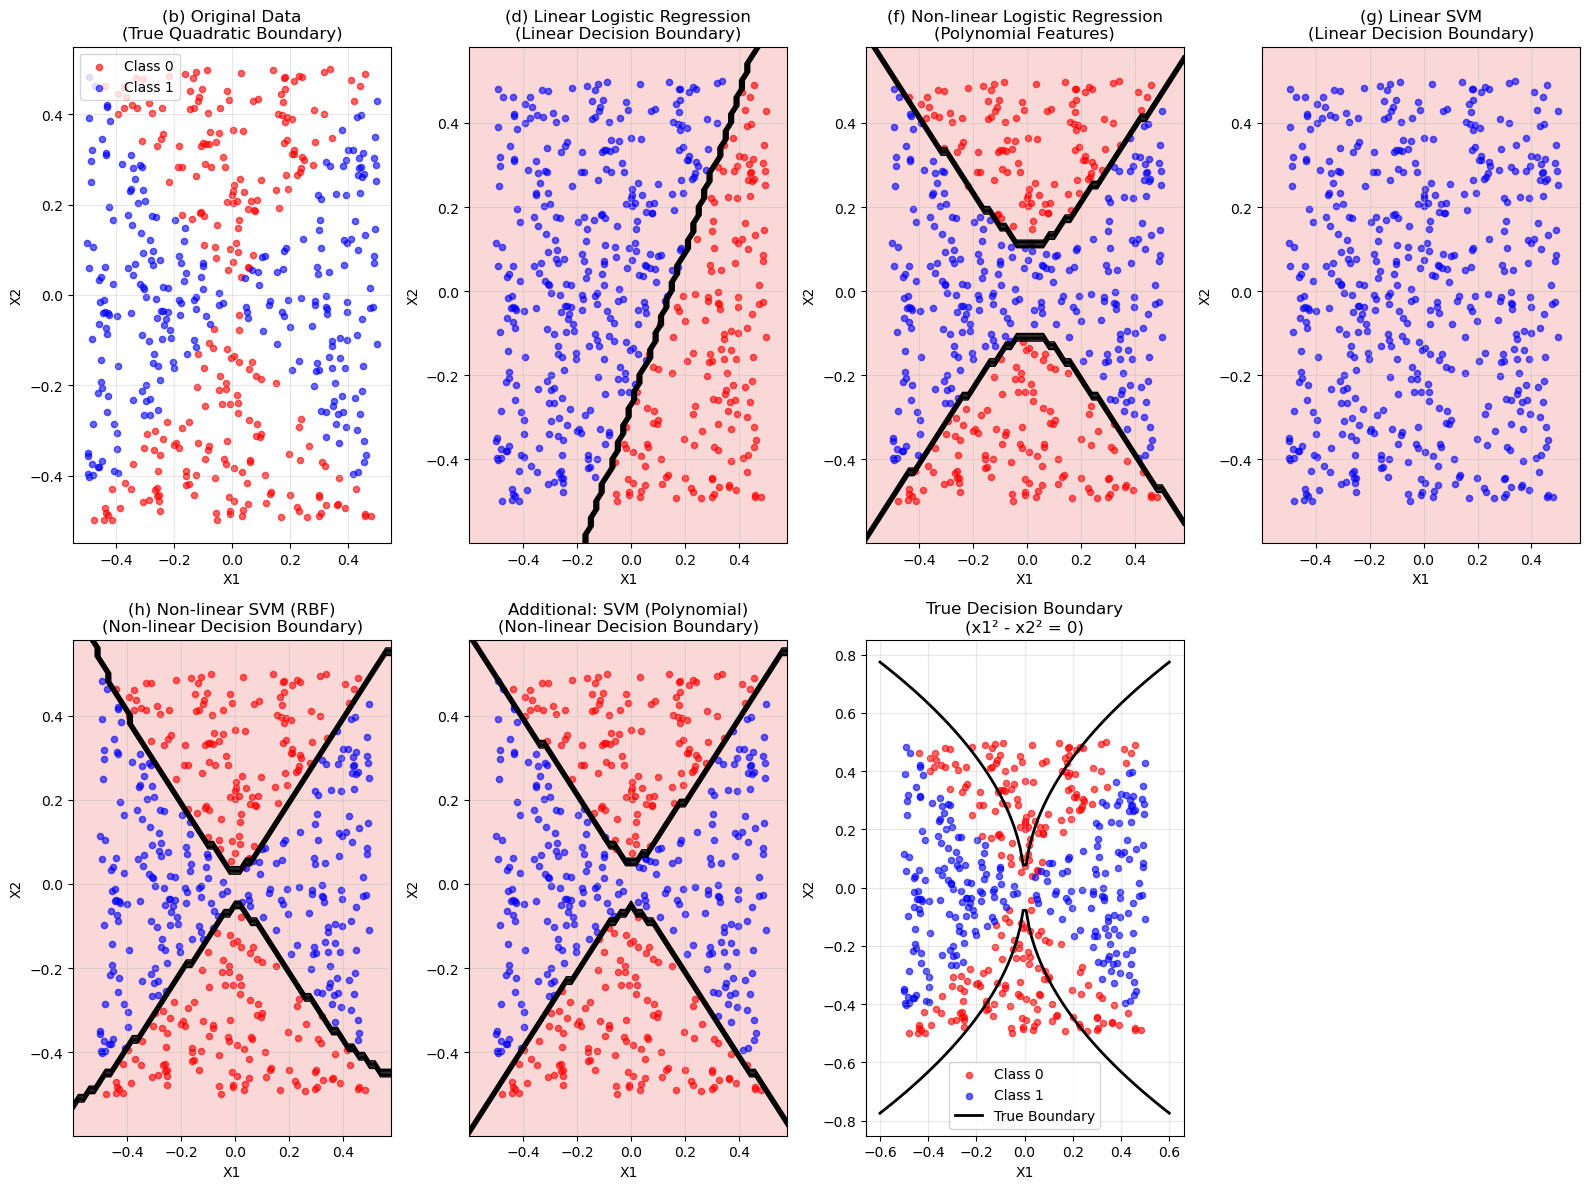


(i) SUMMARY:
1. Linear Logistic Regression Accuracy: 0.430
2. Non-linear Logistic Regression Accuracy: 0.958
3. Linear SVM Accuracy: 0.506
4. Non-linear SVM (RBF) Accuracy: 0.986
5. Non-linear SVM (Polynomial) Accuracy: 0.980


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
import warnings
warnings.filterwarnings('ignore')

plt.style.use('default')
fig = plt.figure(figsize=(16, 12))

# 5a
print("(a) Generating dataset with quadratic decision boundary...")
rng = np.random.default_rng(5)
x1 = rng.uniform(size=500) - 0.5
x2 = rng.uniform(size=500) - 0.5
y = (x1**2 - x2**2 > 0).astype(int)  # Convert boolean to 0/1


X = np.column_stack([x1, x2])

print(f"Dataset created: {len(X)} observations with {X.shape[1]} features")
print(f"Class distribution: {np.bincount(y)}")

# 5b
plt.subplot(2, 4, 1)
colors = ['red', 'blue']
for i in [0, 1]:
    mask = y == i
    plt.scatter(x1[mask], x2[mask], c=colors[i], alpha=0.6, s=20, 
               label=f'Class {i}')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('(b) Original Data\n(True Quadratic Boundary)')
plt.legend()
plt.grid(True, alpha=0.3)

# 5c
print("\n(c) Fitting linear logistic regression...")
log_reg_linear = LogisticRegression(random_state=42)
log_reg_linear.fit(X, y)

# 5d
print("(d) Plotting linear logistic regression results...")
plt.subplot(2, 4, 2)

h = 0.02
x1_min, x1_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
x2_min, x2_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, h),
                       np.arange(x2_min, x2_max, h))

mesh_points = np.c_[xx1.ravel(), xx2.ravel()]
Z_linear = log_reg_linear.predict(mesh_points)
Z_linear = Z_linear.reshape(xx1.shape)

plt.contourf(xx1, xx2, Z_linear, alpha=0.3, colors=['lightcoral', 'lightblue'])
plt.contour(xx1, xx2, Z_linear, colors='black', linewidths=1)

y_pred_linear = log_reg_linear.predict(X)
for i in [0, 1]:
    mask = y_pred_linear == i
    plt.scatter(X[mask, 0], X[mask, 1], c=colors[i], alpha=0.6, s=20)

plt.xlabel('X1')
plt.ylabel('X2')
plt.title('(d) Linear Logistic Regression\n(Linear Decision Boundary)')
plt.grid(True, alpha=0.3)

accuracy_linear = np.mean(y_pred_linear == y)
print(f"Linear logistic regression accuracy: {accuracy_linear:.3f}")

# 5e
print("\n(e) Fitting non-linear logistic regression...")
poly_features = PolynomialFeatures(degree=2, include_bias=False)
log_reg_poly = Pipeline([
    ('poly', poly_features),
    ('logistic', LogisticRegression(random_state=42))
])
log_reg_poly.fit(X, y)

# 5f
print("(f) Plotting non-linear logistic regression results...")
plt.subplot(2, 4, 3)

Z_poly = log_reg_poly.predict(mesh_points)
Z_poly = Z_poly.reshape(xx1.shape)

plt.contourf(xx1, xx2, Z_poly, alpha=0.3, colors=['lightcoral', 'lightblue'])
plt.contour(xx1, xx2, Z_poly, colors='black', linewidths=1)

y_pred_poly = log_reg_poly.predict(X)
for i in [0, 1]:
    mask = y_pred_poly == i
    plt.scatter(X[mask, 0], X[mask, 1], c=colors[i], alpha=0.6, s=20)

plt.xlabel('X1')
plt.ylabel('X2')
plt.title('(f) Non-linear Logistic Regression\n(Polynomial Features)')
plt.grid(True, alpha=0.3)

accuracy_poly = np.mean(y_pred_poly == y)
print(f"Non-linear logistic regression accuracy: {accuracy_poly:.3f}")

# 5g
print("\n(g) Fitting linear SVM...")
svm_linear = SVC(kernel='linear', random_state=42)
svm_linear.fit(X, y)

plt.subplot(2, 4, 4)

Z_svm_linear = svm_linear.predict(mesh_points)
Z_svm_linear = Z_svm_linear.reshape(xx1.shape)

plt.contourf(xx1, xx2, Z_svm_linear, alpha=0.3, colors=['lightcoral', 'lightblue'])
plt.contour(xx1, xx2, Z_svm_linear, colors='black', linewidths=1)

y_pred_svm_linear = svm_linear.predict(X)
for i in [0, 1]:
    mask = y_pred_svm_linear == i
    plt.scatter(X[mask, 0], X[mask, 1], c=colors[i], alpha=0.6, s=20)

plt.xlabel('X1')
plt.ylabel('X2')
plt.title('(g) Linear SVM\n(Linear Decision Boundary)')
plt.grid(True, alpha=0.3)

accuracy_svm_linear = np.mean(y_pred_svm_linear == y)
print(f"Linear SVM accuracy: {accuracy_svm_linear:.3f}")

# 5h
print("\n(h) Fitting non-linear SVM with RBF kernel...")
svm_rbf = SVC(kernel='rbf', random_state=42, gamma='scale')
svm_rbf.fit(X, y)

plt.subplot(2, 4, 5)

Z_svm_rbf = svm_rbf.predict(mesh_points)
Z_svm_rbf = Z_svm_rbf.reshape(xx1.shape)

plt.contourf(xx1, xx2, Z_svm_rbf, alpha=0.3, colors=['lightcoral', 'lightblue'])
plt.contour(xx1, xx2, Z_svm_rbf, colors='black', linewidths=1)

y_pred_svm_rbf = svm_rbf.predict(X)
for i in [0, 1]:
    mask = y_pred_svm_rbf == i
    plt.scatter(X[mask, 0], X[mask, 1], c=colors[i], alpha=0.6, s=20)

plt.xlabel('X1')
plt.ylabel('X2')
plt.title('(h) Non-linear SVM (RBF)\n(Non-linear Decision Boundary)')
plt.grid(True, alpha=0.3)

accuracy_svm_rbf = np.mean(y_pred_svm_rbf == y)
print(f"Non-linear SVM (RBF) accuracy: {accuracy_svm_rbf:.3f}")

print("\nAdditional: Fitting SVM with polynomial kernel...")
svm_poly = SVC(kernel='poly', degree=2, random_state=42, gamma='scale')
svm_poly.fit(X, y)

plt.subplot(2, 4, 6)

Z_svm_poly = svm_poly.predict(mesh_points)
Z_svm_poly = Z_svm_poly.reshape(xx1.shape)

plt.contourf(xx1, xx2, Z_svm_poly, alpha=0.3, colors=['lightcoral', 'lightblue'])
plt.contour(xx1, xx2, Z_svm_poly, colors='black', linewidths=1)

y_pred_svm_poly = svm_poly.predict(X)
for i in [0, 1]:
    mask = y_pred_svm_poly == i
    plt.scatter(X[mask, 0], X[mask, 1], c=colors[i], alpha=0.6, s=20)

plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Additional: SVM (Polynomial)\n(Non-linear Decision Boundary)')
plt.grid(True, alpha=0.3)

accuracy_svm_poly = np.mean(y_pred_svm_poly == y)
print(f"Polynomial SVM accuracy: {accuracy_svm_poly:.3f}")

plt.subplot(2, 4, 7)
x1_boundary = np.linspace(-0.6, 0.6, 100)
x2_pos = np.sqrt(np.abs(x1_boundary))  # x2 = |x1| for boundary
x2_neg = -np.sqrt(np.abs(x1_boundary))  #  x2 = -|x1| for boundary

for i in [0, 1]:
    mask = y == i
    plt.scatter(X[mask, 0], X[mask, 1], c=colors[i], alpha=0.6, s=20, 
               label=f'Class {i}')

plt.plot(x1_boundary, x2_pos, 'k-', linewidth=2, label='True Boundary')
plt.plot(x1_boundary, x2_neg, 'k-', linewidth=2)
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('True Decision Boundary\n(x1² - x2² = 0)')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# 5i
print("\n" + "="*50)
print("(i) SUMMARY:")
print("="*50)
print(f"1. Linear Logistic Regression Accuracy: {accuracy_linear:.3f}")
print(f"2. Non-linear Logistic Regression Accuracy: {accuracy_poly:.3f}")
print(f"3. Linear SVM Accuracy: {accuracy_svm_linear:.3f}")
print(f"4. Non-linear SVM (RBF) Accuracy: {accuracy_svm_rbf:.3f}")
print(f"5. Non-linear SVM (Polynomial) Accuracy: {accuracy_svm_poly:.3f}")


## 7(a-d)

Auto dataset shape: (392, 8)
Columns: ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'year', 'origin']
Median MPG: 22.75
High MPG distribution:
high_mpg
0    196
1    196
Name: count, dtype: int64

Features used: ['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'year', 'origin']

(b) Linear SVM with different C values
C =  0.01: CV Error = 0.0996
C =  0.10: CV Error = 0.1249
C =  1.00: CV Error = 0.1477
C = 10.00: CV Error = 0.1426
C = 100.00: CV Error = 0.1426
Best C for linear: 0.01

(c) RBF and Polynomial kernels
RBF Kernel:
C =   1, gamma = 0.01: CV Error = 0.0996
C =   1, gamma = 0.10: CV Error = 0.1377
C =   1, gamma = 1.00: CV Error = 0.1349
C =  10, gamma = 0.01: CV Error = 0.1326
C =  10, gamma = 0.10: CV Error = 0.1988
C =  10, gamma = 1.00: CV Error = 0.1808
C = 100, gamma = 0.01: CV Error = 0.1554
C = 100, gamma = 0.10: CV Error = 0.2090
C = 100, gamma = 1.00: CV Error = 0.2013
Best RBF: C = 1, gamma = 0.01

Polynomial Kern

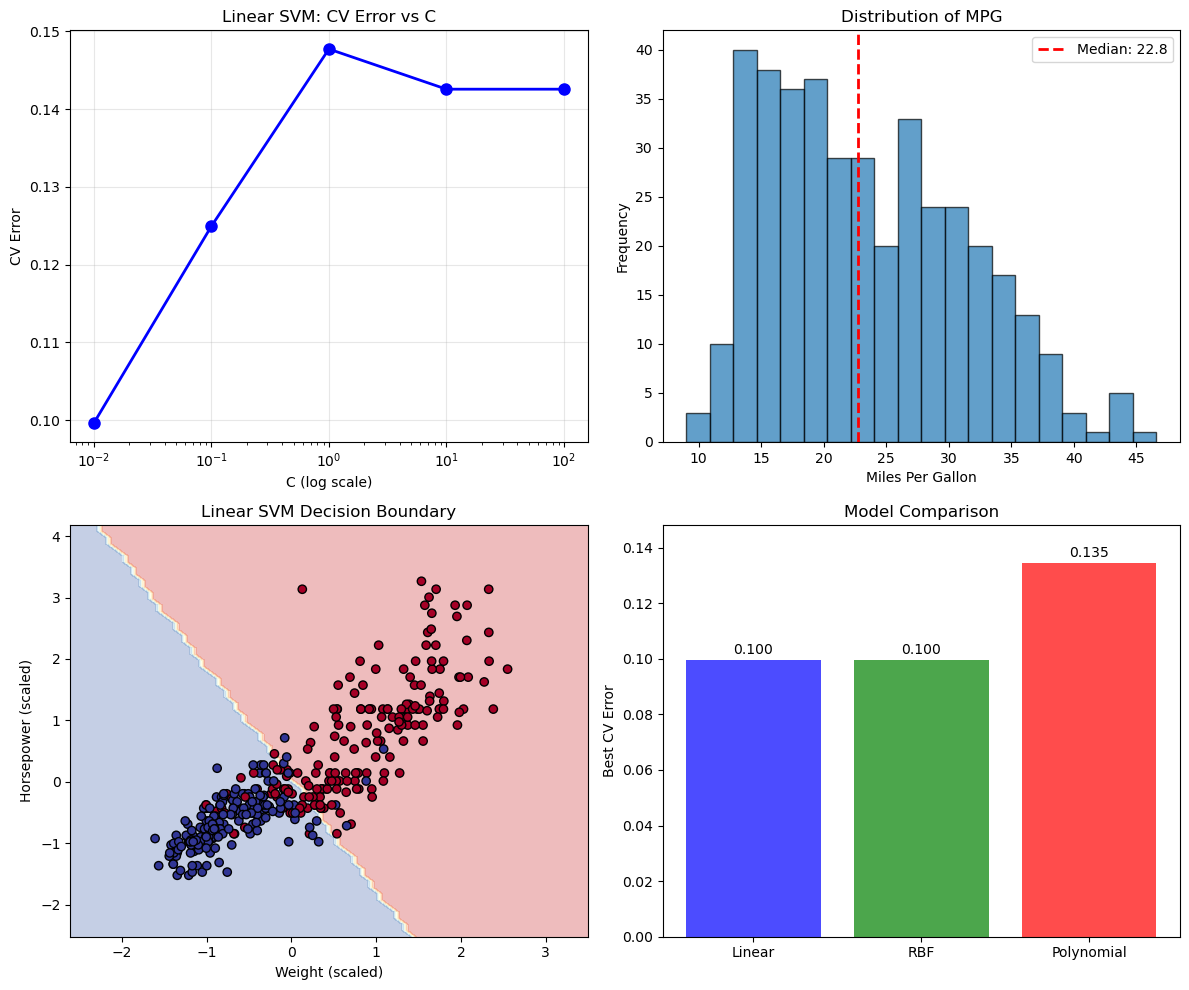


SUMMARY
Best Linear SVM: C = 0.01, CV Error = 0.0996
Best RBF SVM: C = 1, gamma = 0.01, CV Error = 0.0996
Best Poly SVM: C = 10, degree = 3, CV Error = 0.1346

Conclusion: RBF SVM performs best


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from ISLP import load_data


Auto = load_data('Auto')
print("Auto dataset shape:", Auto.shape)
print("Columns:", Auto.columns.tolist())

#7a
median_mpg = Auto['mpg'].median()
Auto['high_mpg'] = (Auto['mpg'] > median_mpg).astype(int)
print(f"Median MPG: {median_mpg:.2f}")
print(f"High MPG distribution:\n{Auto['high_mpg'].value_counts()}")


cols_to_drop = ['mpg', 'high_mpg']
if 'name' in Auto.columns:
    cols_to_drop.append('name')

X = Auto.drop(cols_to_drop, axis=1)
y = Auto['high_mpg']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print(f"\nFeatures used: {X.columns.tolist()}")

# 7b
print("\n" + "="*50)
print("(b) Linear SVM with different C values")
print("="*50)

C_values = [0.01, 0.1, 1, 10, 100]
linear_results = []

for C in C_values:
    svm_linear = SVC(kernel='linear', C=C)
    cv_scores = cross_val_score(svm_linear, X_scaled, y, cv=5)
    cv_error = 1 - cv_scores.mean()
    linear_results.append(cv_error)
    print(f"C = {C:5.2f}: CV Error = {cv_error:.4f}")

best_C_linear = C_values[np.argmin(linear_results)]
print(f"Best C for linear: {best_C_linear}")

# 7c
print("\n" + "="*50)
print("(c) RBF and Polynomial kernels")
print("="*50)


print("RBF Kernel:")
C_values_rbf = [1, 10, 100]
gamma_values = [0.01, 0.1, 1]
best_rbf_error = float('inf')
best_rbf_params = {}

for C in C_values_rbf:
    for gamma in gamma_values:
        svm_rbf = SVC(kernel='rbf', C=C, gamma=gamma)
        cv_scores = cross_val_score(svm_rbf, X_scaled, y, cv=5)
        cv_error = 1 - cv_scores.mean()
        print(f"C = {C:3d}, gamma = {gamma:4.2f}: CV Error = {cv_error:.4f}")
        
        if cv_error < best_rbf_error:
            best_rbf_error = cv_error
            best_rbf_params = {'C': C, 'gamma': gamma}

print(f"Best RBF: C = {best_rbf_params['C']}, gamma = {best_rbf_params['gamma']}")


print("\nPolynomial Kernel:")
degrees = [2, 3, 4]
best_poly_error = float('inf')
best_poly_params = {}

for C in [1, 10, 100]:
    for degree in degrees:
        svm_poly = SVC(kernel='poly', C=C, degree=degree, gamma='scale')
        cv_scores = cross_val_score(svm_poly, X_scaled, y, cv=5)
        cv_error = 1 - cv_scores.mean()
        print(f"C = {C:3d}, degree = {degree}: CV Error = {cv_error:.4f}")
        
        if cv_error < best_poly_error:
            best_poly_error = cv_error
            best_poly_params = {'C': C, 'degree': degree}

print(f"Best Polynomial: C = {best_poly_params['C']}, degree = {best_poly_params['degree']}")

# 7d
print("\n" + "="*50)
print("(d) Creating plots")
print("="*50)

fig, axes = plt.subplots(2, 2, figsize=(12, 10))


axes[0,0].semilogx(C_values, linear_results, 'bo-', linewidth=2, markersize=8)
axes[0,0].set_xlabel('C (log scale)')
axes[0,0].set_ylabel('CV Error')
axes[0,0].set_title('Linear SVM: CV Error vs C')
axes[0,0].grid(True, alpha=0.3)

axes[0,1].hist(Auto['mpg'], bins=20, alpha=0.7, edgecolor='black')
axes[0,1].axvline(median_mpg, color='red', linestyle='--', linewidth=2, 
                  label=f'Median: {median_mpg:.1f}')
axes[0,1].set_xlabel('Miles Per Gallon')
axes[0,1].set_ylabel('Frequency')
axes[0,1].set_title('Distribution of MPG')
axes[0,1].legend()

X_plot = Auto[['weight', 'horsepower']]
X_plot_scaled = scaler.fit_transform(X_plot)

svm_best = SVC(kernel='linear', C=best_C_linear)
svm_best.fit(X_plot_scaled, y)

h = 0.1
x_min, x_max = X_plot_scaled[:, 0].min() - 1, X_plot_scaled[:, 0].max() + 1
y_min, y_max = X_plot_scaled[:, 1].min() - 1, X_plot_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = svm_best.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

axes[1,0].contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.RdYlBu)
scatter = axes[1,0].scatter(X_plot_scaled[:, 0], X_plot_scaled[:, 1], c=y, 
                           cmap=plt.cm.RdYlBu, edgecolors='black')
axes[1,0].set_xlabel('Weight (scaled)')
axes[1,0].set_ylabel('Horsepower (scaled)')
axes[1,0].set_title('Linear SVM Decision Boundary')

models = ['Linear', 'RBF', 'Polynomial']
errors = [min(linear_results), best_rbf_error, best_poly_error]

bars = axes[1,1].bar(models, errors, color=['blue', 'green', 'red'], alpha=0.7)
axes[1,1].set_ylabel('Best CV Error')
axes[1,1].set_title('Model Comparison')
axes[1,1].set_ylim(0, max(errors) * 1.1)

for bar, error in zip(bars, errors):
    axes[1,1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.001,
                   f'{error:.3f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

print("\n" + "="*50)
print("SUMMARY")
print("="*50)
print(f"Best Linear SVM: C = {best_C_linear}, CV Error = {min(linear_results):.4f}")
print(f"Best RBF SVM: C = {best_rbf_params['C']}, gamma = {best_rbf_params['gamma']}, CV Error = {best_rbf_error:.4f}")
print(f"Best Poly SVM: C = {best_poly_params['C']}, degree = {best_poly_params['degree']}, CV Error = {best_poly_error:.4f}")

if min(linear_results) <= best_rbf_error and min(linear_results) <= best_poly_error:
    print("\nConclusion: Linear SVM performs best")
elif best_rbf_error <= best_poly_error:
    print("\nConclusion: RBF SVM performs best")
else:
    print("\nConclusion: Polynomial SVM performs best")

## 8(a-h)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

try:
    from ISLP import load_data
    OJ = load_data('OJ')
except:
    print("Please ensure OJ dataset is available. Loading sample structure...")


X = OJ.drop('Purchase', axis=1)
y = OJ['Purchase']


from sklearn.preprocessing import LabelEncoder
le_dict = {}
for col in X.columns:
    if X[col].dtype == 'object' or X[col].dtype.name == 'category':
        le_dict[col] = LabelEncoder()
        X[col] = le_dict[col].fit_transform(X[col])


if y.dtype == 'object' or y.dtype.name == 'category':
    le_y = LabelEncoder()
    y = le_y.fit_transform(y)

# 8a
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=800, random_state=42)

print(f"Training set size: {len(X_train)}")
print(f"Test set size: {len(X_test)}")

# 8b
svm_linear = SVC(kernel='linear', C=0.01)
svm_linear.fit(X_train, y_train)

print(f"\n(b) Support vectors with C=0.01: {svm_linear.n_support_.sum()}")

# 8c
train_pred = svm_linear.predict(X_train)
test_pred = svm_linear.predict(X_test)
train_error = 1 - accuracy_score(y_train, train_pred)
test_error = 1 - accuracy_score(y_test, test_pred)

print(f"\n(c) Training error rate: {train_error:.4f}")
print(f"    Test error rate: {test_error:.4f}")

# 8d
print("\n(d) Running cross-validation...")
C_values = [0.01, 0.1, 1, 10]
try:
    cv_svm = GridSearchCV(SVC(kernel='linear'), {'C': C_values}, cv=3, n_jobs=1)
    cv_svm.fit(X_train, y_train)
    best_C = cv_svm.best_params_['C']
    print(f"    Optimal C: {best_C}")
except Exception as e:
    print(f"    CV failed: {e}")
    best_C = 1  # fallback

# 8e
optimal_svm = SVC(kernel='linear', C=best_C)
optimal_svm.fit(X_train, y_train)

train_pred_opt = optimal_svm.predict(X_train)
test_pred_opt = optimal_svm.predict(X_test)
train_error_opt = 1 - accuracy_score(y_train, train_pred_opt)
test_error_opt = 1 - accuracy_score(y_test, test_pred_opt)

print(f"\n(e) With optimal C={best_C}:")
print(f"    Support vectors: {optimal_svm.n_support_.sum()}")
print(f"    Training error: {train_error_opt:.4f}")
print(f"    Test error: {test_error_opt:.4f}")

# 8f
print(f"\n(f) Radial kernel SVM:")

svm_radial = SVC(kernel='rbf', C=0.01)
svm_radial.fit(X_train, y_train)
print(f"    Support vectors (C=0.01): {svm_radial.n_support_.sum()}")

train_pred_rad = svm_radial.predict(X_train)
test_pred_rad = svm_radial.predict(X_test)
print(f"    Training error (C=0.01): {1 - accuracy_score(y_train, train_pred_rad):.4f}")
print(f"    Test error (C=0.01): {1 - accuracy_score(y_test, test_pred_rad):.4f}")

print("    Running CV for radial kernel...")
try:
    cv_radial = GridSearchCV(SVC(kernel='rbf'), {'C': C_values}, cv=3, n_jobs=1)
    cv_radial.fit(X_train, y_train)
    best_C_rad = cv_radial.best_params_['C']
except Exception as e:
    print(f"    CV failed: {e}")
    best_C_rad = 1

optimal_radial = SVC(kernel='rbf', C=best_C_rad)
optimal_radial.fit(X_train, y_train)

train_pred_rad_opt = optimal_radial.predict(X_train)
test_pred_rad_opt = optimal_radial.predict(X_test)

print(f"    Optimal C: {best_C_rad}")
print(f"    Support vectors (optimal): {optimal_radial.n_support_.sum()}")
print(f"    Training error (optimal): {1 - accuracy_score(y_train, train_pred_rad_opt):.4f}")
print(f"    Test error (optimal): {1 - accuracy_score(y_test, test_pred_rad_opt):.4f}")

# 8g
print(f"\n(g) Polynomial kernel SVM (degree=2):")

svm_poly = SVC(kernel='poly', degree=2, C=0.01)
svm_poly.fit(X_train, y_train)
print(f"    Support vectors (C=0.01): {svm_poly.n_support_.sum()}")

train_pred_poly = svm_poly.predict(X_train)
test_pred_poly = svm_poly.predict(X_test)
print(f"    Training error (C=0.01): {1 - accuracy_score(y_train, train_pred_poly):.4f}")
print(f"    Test error (C=0.01): {1 - accuracy_score(y_test, test_pred_poly):.4f}")

print("    Running CV for polynomial kernel...")
try:
    cv_poly = GridSearchCV(SVC(kernel='poly', degree=2), {'C': C_values}, cv=3, n_jobs=1)
    cv_poly.fit(X_train, y_train)
    best_C_poly = cv_poly.best_params_['C']
except Exception as e:
    print(f"    CV failed: {e}")
    best_C_poly = 1

optimal_poly = SVC(kernel='poly', degree=2, C=best_C_poly)
optimal_poly.fit(X_train, y_train)

train_pred_poly_opt = optimal_poly.predict(X_train)
test_pred_poly_opt = optimal_poly.predict(X_test)

print(f"    Optimal C: {best_C_poly}")
print(f"    Support vectors (optimal): {optimal_poly.n_support_.sum()}")
print(f"    Training error (optimal): {1 - accuracy_score(y_train, train_pred_poly_opt):.4f}")
print(f"    Test error (optimal): {1 - accuracy_score(y_test, test_pred_poly_opt):.4f}")

print(f"\n(h) Summary of best results:")
print(f"    Linear SVM (C={best_C}): Test error = {test_error_opt:.4f}")
print(f"    Radial SVM (C={best_C_rad}): Test error = {1 - accuracy_score(y_test, test_pred_rad_opt):.4f}")
print(f"    Polynomial SVM (C={best_C_poly}): Test error = {1 - accuracy_score(y_test, test_pred_poly_opt):.4f}")

test_errors = {
    'Linear': 1 - accuracy_score(y_test, test_pred_opt),
    'Radial': 1 - accuracy_score(y_test, test_pred_rad_opt),
    'Polynomial': 1 - accuracy_score(y_test, test_pred_poly_opt)
}

best_method = min(test_errors, key=test_errors.get)
print(f"\n    Best approach: {best_method} SVM with test error = {test_errors[best_method]:.4f}")